# Extracting the Google News and Stock Price data

In [523]:
## packages need to be imported

import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import requests
import json
from pandas.io.json import json_normalize
from newsapi import NewsApiClient
import datetime as DT
import requests
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import matplotlib.animation as animation
from nltk.corpus import stopwords

In [593]:
## News article of a particular company

def get_symbol(symbol):
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)

    result = requests.get(url).json()

    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

companyName=input("Enter the Company symbol:") 
company=get_symbol(companyName)

Enter the Company symbol:AAPL


In [594]:
## 

today = DT.date.today()
today
Days_ago = today - DT.timedelta(days=30)
Days_ago 
end = DT.date.today()
end=end.strftime('%Y-%m-%d')
thirtyDays_ago=Days_ago.strftime('%Y-%m-%d')

In [595]:
## extracting the newsarticle

NewsApi = NewsApiClient(api_key='c5207a2a09f84a87bbdac4ac3e997b77')
sources = NewsApi.get_sources()
all_articles = NewsApi.get_everything(q=company,
                                      from_param=thirtyDays_ago,
                                      to=end,
                                      language='en',
                                      sort_by='relevancy',
                                      page_size=100,
                                      )

with open('NewsData.json', 'w') as outfile:
    json.dump(all_articles, outfile)


with open("NewsData.json", "r") as read_file_news:
    NewsData = json.load(read_file_news)

## Normalizing the jason file
Newsdf=json_normalize(NewsData['articles'])
Newsdf['publishedAt']=pd.to_datetime(Newsdf['publishedAt'], infer_datetime_format = True)

Newsdf['publishedAt']=Newsdf['publishedAt'].dt.date
Newsdf=Newsdf[['publishedAt','description','author', 'content', 'source.id',
       'source.name', 'title','url']]
Newsdf

,publishedAt,description,author,content,source.id,source.name,title,url
0,2019-04-28,Apple poached Intel’s lead developer for 5G ph...,Tom McKay,Apple poached Intels lead developer for 5G pho...,None,Gizmodo.com,Report: Apple Poached Intel's Smartphone 5G Mo...,https://gizmodo.com/report-apple-poached-intel...
1,2019-04-26,Apple has considered buying Intel's smartphone...,Karissa Bell,Apple has considered buying Intel's smartphone...,mashable,Mashable,"Apple could buy Intel's modem business, report...",https://mashable.com/article/apple-intel-modem...
2,2019-05-04,Berkshire's Charlie Munger Says Not Buying Goo...,None,None,bloomberg,Bloomberg,Berkshire's Charlie Munger Says Not Buying Goo...,https://www.bloomberg.com/tosv2.html?vid=&uuid...
3,2019-05-13,"If you’re a typical iPhone user, there’s reall...",Sam Rutherford,"If youre a typical iPhone user, theres really ...",None,Gizmodo.com,Supreme Court Rules Apple Can Be Sued for Mono...,https://gizmodo.com/supreme-court-rules-apple-...
4,2019-04-25,The Indian government lifted a ban on download...,Tom McKay,The Indian government lifted a ban on download...,None,Gizmodo.com,"India Lifts Its Ban on Video App TikTok, Allow...",https://gizmodo.com/india-lifts-its-ban-on-vid...
5,2019-05-01,"The family of Walter Huang, an Apple engineer ...",Kirsten Korosec,"The family of Walter Huang, an Apple engineer ...",techcrunch,TechCrunch,Tesla sued in wrongful death lawsuit that alle...,http://techcrunch.com/2019/05/01/tesla-sued-in...
6,2019-04-26,Taylor Swift surprised fans in front of a butt...,JOE COSCARELLI,Swift announced in November that she had signe...,the-new-york-times,The New York Times,"Taylor Swift Releases ‘Me!,’ a New Song Featur...",https://www.nytimes.com/2019/04/26/arts/music/...
7,2019-04-26,Taylor Swift surprised fans in front of a butt...,JOE COSCARELLI,Swift announced in November that she had signe...,the-new-york-times,The New York Times,"Taylor Swift Releases ‘Me!,’ a New Song Featur...",https://www.nytimes.com/2019/04/26/arts/music/...
8,2019-04-25,Microsoft Corp's market value vaulted above th...,None,(Reuters) - Microsoft Corp's market value vaul...,None,Yahoo.com,"Microsoft market cap touches $1 trillion, pull...",https://news.yahoo.com/microsoft-market-cap-to...
9,2019-04-26,"In money terms, its 2018 R&D budget trailed on...",None,(Bloomberg) -- Huawei Technologies Co. wants t...,None,Yahoo.com,"No Pay, No Gain: Huawei Outspends Apple on R&D...",https://news.yahoo.com/no-pay-no-gain-huawei-0...


In [596]:
## extracting the stock price of the selected company 

stocksApi = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={}&outputsize=compact&apikey=QNG871ZNEMCWIWP9".format(companyName))
sApi=stocksApi.json()
with open('stocksData.json', 'w') as outfile:
    json.dump(sApi, outfile)

stocksDf=pd.DataFrame.from_dict(sApi['Time Series (Daily)'], orient="index")

stocksDf.index = pd.to_datetime(stocksDf.index)


stocksDf=stocksDf.loc[Days_ago:end]

stocksDf=stocksDf.astype('float')
stocksDf

,1. open,2. high,3. low,4. close,5. volume
2019-04-17,199.540,203.3800,198.610,203.13,28906780.0
2019-04-18,203.120,204.1500,202.520,203.86,24195766.0
2019-04-22,202.830,204.9400,202.340,204.53,19439545.0
2019-04-23,204.430,207.7500,203.900,207.48,23322991.0
2019-04-24,207.360,208.4800,207.050,207.16,17540609.0
2019-04-25,206.830,207.7600,205.120,205.28,18543206.0
2019-04-26,204.900,205.0000,202.120,204.30,18649102.0
2019-04-29,204.400,205.9700,203.860,204.61,22204716.0
2019-04-30,203.060,203.4000,199.110,200.67,46534923.0
2019-05-01,209.880,215.3100,209.230,210.52,64827328.0


In [532]:
## coverting the datatype of description from object to string

Newsdf['description']=Newsdf['description'].astype(str)
Newsdf
News_dummy=Newsdf
   

## droping out duplicate news articles 

Newsdf =Newsdf.drop_duplicates('description')




In [533]:
## total count of every column

Newsdf.count()

publishedAt    92
description    92
author         73
content        88
source.id      16
source.name    92
title          92
url            92
dtype: int64

In [534]:
## sorting the data according to dates

Newsdf = Newsdf.sort_values(['publishedAt'])

In [535]:
Newsdf['publishedAt'].describe()

## shows that, are there any articles missing in a month which can be said from the # unique values.

count             92
unique            26
top       2019-05-01
freq               8
Name: publishedAt, dtype: object

In [536]:
Newsdf['source.name'].describe()

count                  92
unique                 31
top       Marketwatch.com
freq                   27
Name: source.name, dtype: object

In [537]:
Newsdf['source.name'].unique()

## out of 100 news article there are 28 unique sources which have given the artice on APPLE in last 30 days.

array(['Autoblog.com', 'Techmeme.com', 'Marketwatch.com', 'Reuters',
       'Yahoo.com', '9to5mac.com', 'Menafn.com', 'Bloomberg',
       'Bnnbloomberg.ca', 'Pcmag.com', 'Ritholtz.com', 'Gizmodo.com',
       'The New York Times', 'Mashable', 'Business Insider', 'TechCrunch',
       'Apple.com', 'Entrepreneur.com', 'Fool.com', 'Hackaday.com',
       'Sec.gov', 'Appleinsider.com', 'Gamasutra.com', 'Investing.com',
       'Macworld.com', 'Macrumors.com', 'The Globe And Mail', 'USA Today',
       'Boingboing.net', 'Indystar.com', '247wallst.com'], dtype=object)

In [538]:
Newsdf.head(10)

,publishedAt,description,author,content,source.id,source.name,title,url
53,2019-04-17,"Filed under: Emerging Technologies, Technology...",Reuters,SAN FRANCISCO — Apple Inc has held talks with ...,None,Autoblog.com,"Apple in a quest for smaller, cheaper lidar fo...",https://www.autoblog.com/2019/04/17/apple-smal...
68,2019-04-17,Stephen Nellis / Reuters : Sources: Apple is d...,None,None,None,Techmeme.com,Sources: Apple is developing its own lidar sen...,https://www.techmeme.com/190417/p5
70,2019-04-17,"After falling after-hours Tuesday, Netflix Inc...",Ciara Linnane,Netflix Inc. shares moved higher in premarket ...,None,Marketwatch.com,The Ratings Game: Netflix stock climbs premark...,https://www.marketwatch.com/story/netflix-stoc...
41,2019-04-17,Asian share markets got off to a guarded start...,Wayne Cole,SYDNEY (Reuters) - Asian share markets got off...,reuters,Reuters,"Asia holds breath for China data dump, NZ doll...",https://www.reuters.com/article/us-global-mark...
12,2019-04-17,Qualcomm Inc added $30 billion to its market v...,None,"(Adds details, background, comments, shares)\r...",None,Yahoo.com,UPDATE 1-Qualcomm gains $30 bln in market valu...,https://news.yahoo.com/1-qualcomm-gains-30-bln...
51,2019-04-18,Industry experts have explained why Apple need...,Ben Lovejoy,Industry experts have explained why Apple need...,None,9to5mac.com,Experts explain why development of an Apple 5G...,https://9to5mac.com/2019/04/18/apple-5g-chip/
18,2019-04-20,"Qatar- Amazon, Google end boycott of each othe...",MENAFN,(MENAFN - Gulf Times) The frosty relationship ...,None,Menafn.com,"Qatar- Amazon, Google end boycott of each othe...",https://menafn.com/1098414684/Qatar-Amazon-Goo...
65,2019-04-22,A New York student sued Apple Inc. for $1 bill...,Bob Van Voris,A New York student sued \r\nApple Inc. for $1 ...,bloomberg,Bloomberg,Apple Face-Recognition Blamed by New York Teen...,https://www.bloomberg.com/news/articles/2019-0...
91,2019-04-22,Twitter Inc. hasn’t had an easy time adding ne...,Emily Bary,"Twitter Inc. has a history of starting strong,...",None,Marketwatch.com,Earnings Outlook: Twitter earnings: Will anoth...,https://www.marketwatch.com/story/twitter-earn...
59,2019-04-22,"The chief executives of Boeing Co., Facebook I...","Jeremy C. Owens, Emily Bary","The chief executives of Boeing Co., Facebook I...",None,Marketwatch.com,"Earnings Watch: Boeing, Facebook and Tesla are...",https://www.marketwatch.com/story/boeing-faceb...


In [539]:
yz = pd.DataFrame(Newsdf.groupby('source.name').count())
yz
## this shows how many articles were written about

,publishedAt,description,author,content,source.id,title,url
source.name,,,,,,,
247wallst.com,1,1,1,1,0,1,1
9to5mac.com,6,6,6,6,0,6,6
Apple.com,1,1,0,1,0,1,1
Appleinsider.com,1,1,1,1,0,1,1
Autoblog.com,1,1,1,1,0,1,1
Bloomberg,3,3,2,2,3,3,3
Bnnbloomberg.ca,1,1,1,1,0,1,1
Boingboing.net,1,1,1,1,0,1,1
Business Insider,3,3,3,3,3,3,3


In [540]:
Newsdf['author'].describe()

count             73
unique            46
top       Emily Bary
freq               6
Name: author, dtype: object

In [541]:
# author of the article who has writen max articles on apple.

Newsdf.groupby('author').count()

,publishedAt,description,content,source.id,source.name,title,url
author,,,,,,,
"24/7 Wall Street, Jon C. Ogg, 24/7 Wall Street",1,1,1,0,1,1,1
Alissa McAloon,1,1,1,0,1,1,1
Andrew Osterland,3,3,3,0,3,3,3
AppleInsider,1,1,1,0,1,1,1
Barry Ritholtz,1,1,1,0,1,1,1
Ben Lovejoy,3,3,3,0,3,3,3
Bloomberg News,1,1,1,0,1,1,1
Bob Van Voris,1,1,1,1,1,1,1
Brian Benchoff,1,1,1,0,1,1,1


<IPython.core.display.Javascript object>


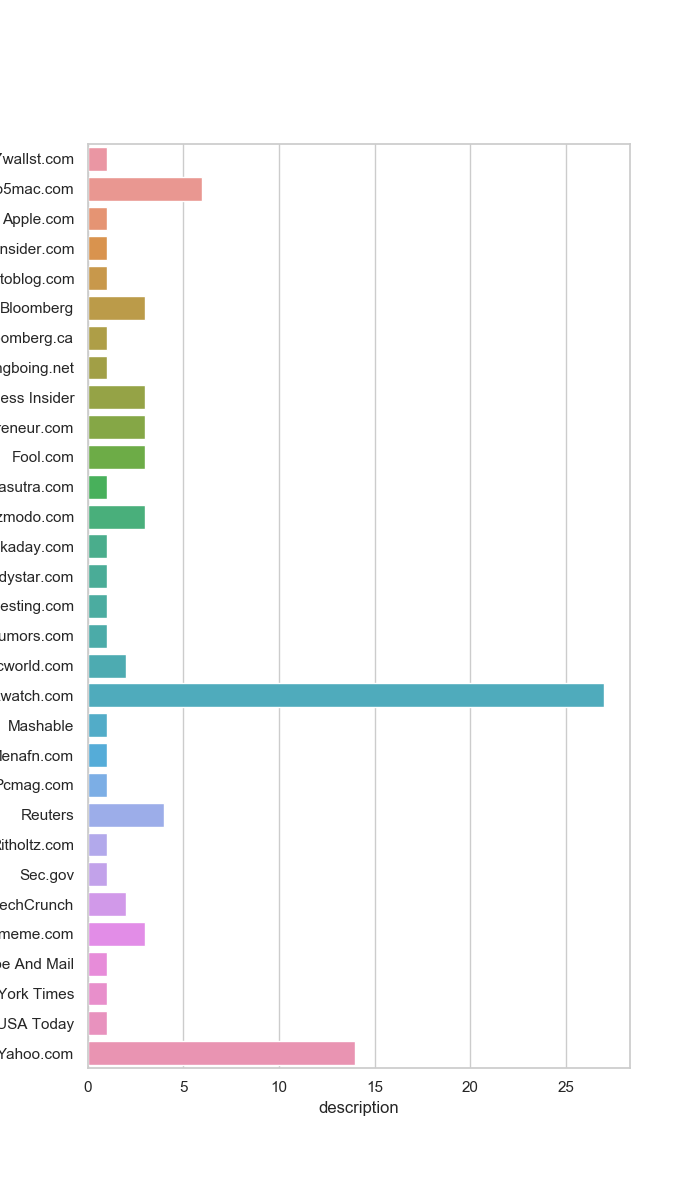

In [543]:
plt.figure(figsize =(7,12))
sb.set(style = 'whitegrid')

sb.barplot( x = yz['description'], y = yz.index)
plt.savefig('ArticlesWrittenBySource.png')
plt.show()

In [544]:
##TO check NA values
Newsdf['description'][pd.isnull(Newsdf['description']) == True]

Series([], Name: description, dtype: object)

In [546]:
xy = pd.DataFrame(Newsdf.groupby('publishedAt').count())
xy
## this shows how many articles were written about Apple on a particular day.

,description,author,content,source.id,source.name,title,url
publishedAt,,,,,,,
2019-04-17,5,3,4,1,5,5,5
2019-04-18,1,1,1,0,1,1,1
2019-04-20,1,1,1,0,1,1,1
2019-04-22,3,3,3,1,3,3,3
2019-04-23,4,4,4,0,4,4,4
2019-04-24,1,1,1,0,1,1,1
2019-04-25,4,2,4,0,4,4,4
2019-04-26,5,2,4,2,5,5,5
2019-04-27,1,1,1,0,1,1,1


<IPython.core.display.Javascript object>


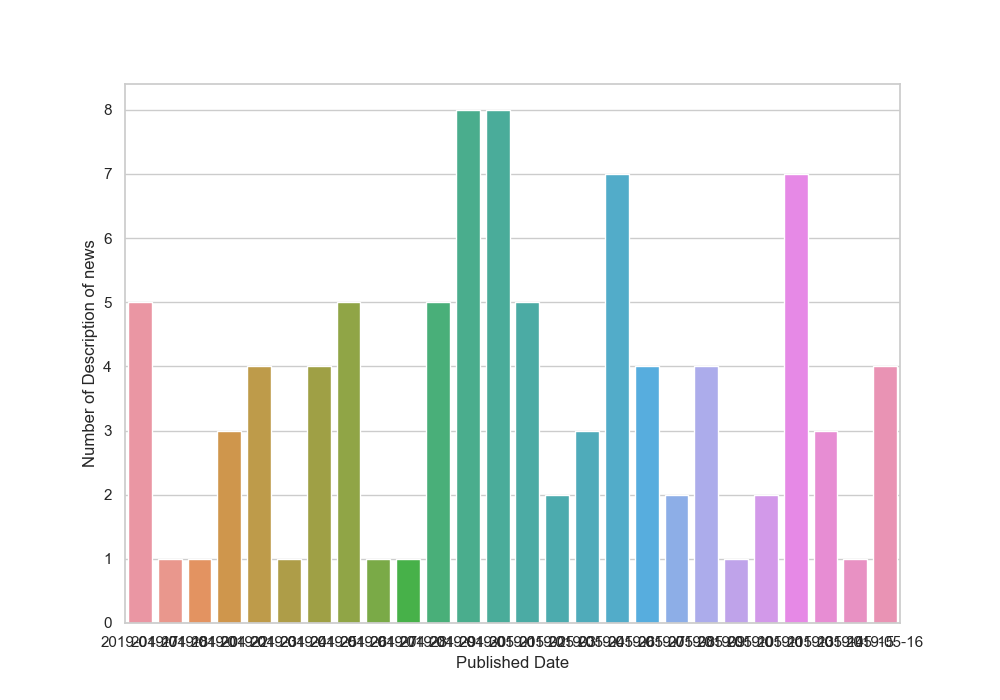

In [600]:
plt.figure(figsize =(10,7))
ax = sb.barplot( x = xy.index , y = xy['description'])
ax.set(xlabel = 'Published Date', ylabel = 'Number of Description of news')
plt.show()

In [548]:
#lowercase
Newsdf['description']= Newsdf['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Newsdf['description'].head()

53    filed under: emerging technologies, technology...
68    stephen nellis / reuters : sources: apple is d...
70    after falling after-hours tuesday, netflix inc...
41    asian share markets got off to a guarded start...
12    qualcomm inc added $30 billion to its market v...
Name: description, dtype: object

In [549]:
## word count 

Newsdf['word_count'] = Newsdf['description'].apply(lambda x: len(str(x).split(" ")))
Newsdf[['description','word_count']].head()

,description,word_count
53,"filed under: emerging technologies, technology...",40
68,stephen nellis / reuters : sources: apple is d...,46
70,"after falling after-hours tuesday, netflix inc...",26
41,asian share markets got off to a guarded start...,35
12,qualcomm inc added $30 billion to its market v...,46


In [550]:

###stop words count
from nltk.corpus import stopwords
stop = stopwords.words('english')






Newsdf['stopwords'] = Newsdf['description'].apply(lambda x: len([x for x in x.split() if x in stop]))
Newsdf[['description','stopwords']].head()

,description,stopwords
53,"filed under: emerging technologies, technology...",15
68,stephen nellis / reuters : sources: apple is d...,13
70,"after falling after-hours tuesday, netflix inc...",7
41,asian share markets got off to a guarded start...,12
12,qualcomm inc added $30 billion to its market v...,17


In [552]:
###stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
Newsdf['description'] = Newsdf['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [553]:
Newsdf['description'][0]

'apple poached intel’s lead developer 5g phone modems, umashankar thyagarajan, february—just weeks buried hatchet rival chip supplier qualcomm april, according report telegraph sunday. read more...'

In [554]:
# of numerics

Newsdf['numerics'] = Newsdf['description'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Newsdf['numerics']

53    0
68    0
70    0
41    0
12    0
51    0
18    0
65    0
91    0
59    0
66    0
10    0
96    1
24    0
82    0
8     0
4     0
80    0
64    1
72    0
6     0
1     0
9     3
37    0
57    0
0     0
94    1
87    0
21    0
48    1
     ..
73    2
71    2
30    0
55    1
98    1
40    0
74    1
92    0
27    0
85    0
84    0
49    0
56    0
13    0
99    0
34    0
15    1
3     0
39    0
23    0
79    0
45    0
77    0
89    1
67    0
31    0
90    0
93    0
19    0
36    0
Name: numerics, Length: 92, dtype: int64

In [555]:
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text

In [556]:

Newsdf=Newsdf.reset_index()





In [559]:
Newsdf_description=Newsdf[['description','publishedAt']]
Newsdf_description

,description,publishedAt
0,"filed under: emerging technologies, technology...",2019-04-17
1,stephen nellis / reuters : sources: apple deve...,2019-04-17
2,"falling after-hours tuesday, netflix inc. shar...",2019-04-17
3,asian share markets got guarded start wednesda...,2019-04-17
4,qualcomm inc added $30 billion market value re...,2019-04-17
5,industry experts explained apple needed sign m...,2019-04-18
6,"qatar- amazon, google end boycott others' vide...",2019-04-20
7,"new york student sued apple inc. $1 billion, c...",2019-04-22
8,twitter inc. hasn’t easy time adding new users...,2019-04-22
9,"chief executives boeing co., facebook inc. tes...",2019-04-22


In [560]:

for i in range(0,len(Newsdf)):
    
    
    Newsdf_description['description'][i]=_removeNonAscii(Newsdf_description['description'][i])



In [561]:
Newsdf_description

,description,publishedAt
0,"filed under: emerging technologies, technology...",2019-04-17
1,stephen nellis / reuters : sources: apple deve...,2019-04-17
2,"falling after-hours tuesday, netflix inc. shar...",2019-04-17
3,asian share markets got guarded start wednesda...,2019-04-17
4,qualcomm inc added $30 billion market value re...,2019-04-17
5,industry experts explained apple needed sign m...,2019-04-18
6,"qatar- amazon, google end boycott others' vide...",2019-04-20
7,"new york student sued apple inc. $1 billion, c...",2019-04-22
8,"twitter inc. hasnt easy time adding new users,...",2019-04-22
9,"chief executives boeing co., facebook inc. tes...",2019-04-22


In [562]:
for i in range(0,len(Newsdf)):
    
    
    Newsdf_description['description'][i]=clean_text(Newsdf_description['description'][i])



In [563]:
Newsdf_description

,description,publishedAt
0,filed under emerging technologies technology a...,2019-04-17
1,stephen nellis reuters sources apple developin...,2019-04-17
2,falling after hours tuesday netflix inc shares...,2019-04-17
3,asian share markets got guarded start wednesda...,2019-04-17
4,qualcomm inc added billion market value resol...,2019-04-17
5,industry experts explained apple needed sign m...,2019-04-18
6,qatar amazon google end boycott others video s...,2019-04-20
7,new york student sued apple inc billion claim...,2019-04-22
8,twitter inc hasnt easy time adding new users t...,2019-04-22
9,chief executives boeing co facebook inc tesla ...,2019-04-22


In [564]:


analyser = SentimentIntensityAnalyzer()
neg=[]
pos=[]
neu=[]
compound=[]


for i in range(0,len(Newsdf_description)):
    #print(i)
    sentence=Newsdf_description['description'][i]
    scores= analyser.polarity_scores(sentence)
    
    pos.append(scores['pos'])
    neg.append(scores['neg'])
    
    neu.append(scores['neu'])
    compound.append(scores['compound'])
   
Newsdf_description['positive']=pos 
Newsdf_description['negative']=neg
Newsdf_description['neutral']=neu
Newsdf_description['compound']=compound
    

Newsdf_description

,description,publishedAt,positive,negative,neutral,compound
0,filed under emerging technologies technology a...,2019-04-17,0.121,0.000,0.879,0.5719
1,stephen nellis reuters sources apple developin...,2019-04-17,0.000,0.000,1.000,0.0000
2,falling after hours tuesday netflix inc shares...,2019-04-17,0.092,0.151,0.756,-0.1027
3,asian share markets got guarded start wednesda...,2019-04-17,0.173,0.066,0.761,0.4767
4,qualcomm inc added billion market value resol...,2019-04-17,0.236,0.078,0.687,0.5106
5,industry experts explained apple needed sign m...,2019-04-18,0.091,0.000,0.909,0.4215
6,qatar amazon google end boycott others video s...,2019-04-20,0.275,0.057,0.668,0.7783
7,new york student sued apple inc billion claim...,2019-04-22,0.000,0.000,1.000,0.0000
8,twitter inc hasnt easy time adding new users t...,2019-04-22,0.217,0.069,0.714,0.6362
9,chief executives boeing co facebook inc tesla ...,2019-04-22,0.191,0.084,0.725,0.4215


In [565]:
## to check whether the article is negative by a human reading

Newsdf['description'][90]

"trump administration wednesday banned huawei buying parts us companies without government's approval. experts say ban could negative implications us technology companies, including apple, one analyst thinks dev…"

In [476]:

dummy_News=Newsdf_description.groupby('publishedAt')[['compound']].mean()

In [569]:
##The Compound score is a metric that calculates the sum of all the lexicon ratings 
#which have been normalized between -1(most extreme negative) and +1 (most extreme positive). 

dummy_News

,compound
publishedAt,
2019-04-17,0.085220
2019-04-18,0.421500
2019-04-20,0.778300
2019-04-22,0.373867
2019-04-23,0.014150
2019-04-24,0.000000
2019-04-25,-0.049425
2019-04-26,0.132220
2019-04-27,0.000000


# Sentiment Score and Stock Price Visualization

In [592]:
## sentiment compounded score.


senti = [go.Scatter( x = dummy_News.index, y = dummy_News['compound'] )]

layout1 = dict(title = 'Sentiment Score Plot')

fig = dict (data = senti, layout = layout1)
py.iplot(fig)

In [567]:
## OHLC Apple stock data


trace = go.Ohlc (x = stocksDf.index, open = stocksDf['1. open'], high = stocksDf['2. high'],low = stocksDf['3. low'], close = stocksDf['4. close'])
data = [trace]

layout ={ 'title' : 'APPLE STOCK IN LAST MONTH',
            'yaxis' : {'title' : 'Apple stock value'}
        }
fig = dict(data = data, layout = layout)
py.iplot(fig)


In [570]:
## only close value

close = [go.Scatter( x = stocksDf.index, y = stocksDf['4. close'] )]

layout = dict(title = 'Closing price')

fig = dict (data = close, layout = layout)
py.iplot(fig)

    

In [571]:
## concatinating sentiment score and stock data

dummy_combined = pd.merge(dummy_News,stocksDf, left_index=True, right_index=True)

In [572]:
dummy_combined

,compound,1. open,2. high,3. low,4. close,5. volume
2019-04-17,0.085220,199.540,203.3800,198.610,203.13,28906780.0
2019-04-18,0.421500,203.120,204.1500,202.520,203.86,24195766.0
2019-04-22,0.373867,202.830,204.9400,202.340,204.53,19439545.0
2019-04-23,0.014150,204.430,207.7500,203.900,207.48,23322991.0
2019-04-24,0.000000,207.360,208.4800,207.050,207.16,17540609.0
2019-04-25,-0.049425,206.830,207.7600,205.120,205.28,18543206.0
2019-04-26,0.132220,204.900,205.0000,202.120,204.30,18649102.0
2019-04-29,0.274480,204.400,205.9700,203.860,204.61,22204716.0
2019-04-30,0.024338,203.060,203.4000,199.110,200.67,46534923.0
2019-05-01,-0.120863,209.880,215.3100,209.230,210.52,64827328.0


In [573]:

dummy_combined=dummy_combined.reset_index()
dummy_combined.head(5)

,index,compound,1. open,2. high,3. low,4. close,5. volume
0,2019-04-17,0.085220,199.54,203.38,198.61,203.13,28906780.0
1,2019-04-18,0.421500,203.12,204.15,202.52,203.86,24195766.0
2,2019-04-22,0.373867,202.83,204.94,202.34,204.53,19439545.0
3,2019-04-23,0.014150,204.43,207.75,203.90,207.48,23322991.0
4,2019-04-24,0.000000,207.36,208.48,207.05,207.16,17540609.0


# Plot of Sentiment Score and Stock Closing Price 

<IPython.core.display.Javascript object>


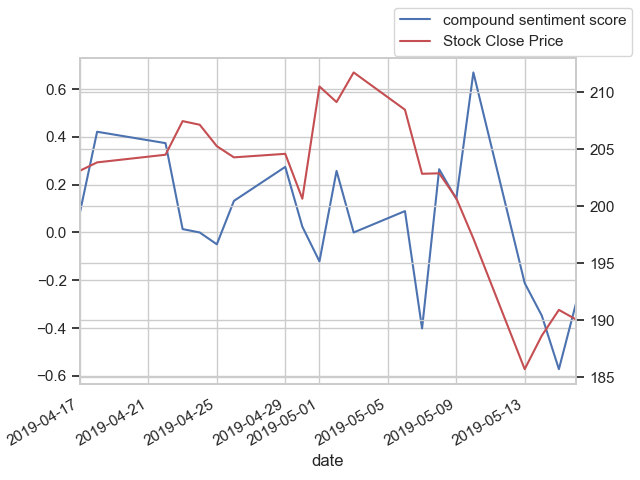

In [574]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame({"date": dummy_combined['index'],
                   "compound sentiment score": dummy_combined['compound'], 
                   "Stock Close Price": dummy_combined['4. close']})

ax = df.plot(x="date", y="compound sentiment score", legend=False)
ax2 = ax.twinx()
df.plot(x="date", y="Stock Close Price", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

# Linear Regression Model

In [576]:


df_stocks = stocksDf.reset_index()

df_stocks.head() 
df_stocks.columns = ['date','open','high','low','close','volume']
df_stocks.head()
y = df_stocks['close']  
X = df_stocks.drop(['date','close'], axis=1, inplace=True)
df_stocks = df_stocks.as_matrix()

from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(df_stocks, y, test_size=0.25,  random_state=0)  



In [577]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)

regression_model_mse

            
regression_model.score(X_test, y_test)
prediction1=regression_model.predict([[189.910,192.4689,188.840,32753393.0]])

In [578]:
regression_model_mse

3.5563769349552907

In [579]:
regression_model.score(X_test, y_test)

0.9257739397772664

In [580]:
prediction1

array([190.59768192])

In [581]:
dummy_predictor=dummy_combined.drop(['level_0'],axis=1)
dummy_predictor.head(5)


KeyError: "['level_0'] not found in axis"

In [582]:

dummy_predictor.columns = ['date','compound','open','high','low','close','volume']
dummy_predictor.head(5)

dummy_predictor=dummy_predictor.drop(['date'],axis=1)



ValueError: Length mismatch: Expected axis has 6 elements, new values have 7 elements

In [583]:

dummy_predictor_matrix=dummy_predictor.as_matrix()

In [584]:
y_price = dummy_predictor[['close']]

In [585]:
dummy_predictor_train, dummy_predictor_test, y_price_train, y_price_test = train_test_split(dummy_predictor_matrix, y_price, test_size=0.25,  random_state=0)




regression_model2 = LinearRegression()
regression_model2.fit(dummy_predictor_train, y_price_train)

regression_model2.score(dummy_predictor_test, y_price_test)

y_price_predict = regression_model2.predict(dummy_predictor_test)
from sklearn.metrics import mean_squared_error
regression_model2_mse = mean_squared_error(y_price_predict, y_price_test)

regression_model2_mse

prediction2=regression_model2.predict([[-0.458100,189.910,192.4689,188.840,190.08,32753393.0]])





In [586]:

regression_model2_mse

regression_model2.score(dummy_predictor_test, y_price_test)


1.0

In [587]:
prediction2

array([[190.08]])

In [589]:
## percentage change in prediction value
    
def pct_change(first, second):
    diff = second - first
    change = 0
    try:
        if diff > 0:
            change = (diff / first) * 100
        elif diff < 0:
            diff = first - second
            change = -((diff / first) * 100)
    except ZeroDivisionError:
        return float('inf')
    return change

In [590]:
pct_change(prediction1,prediction2)

array([[-0.27160977]])